In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data = df.drop(columns=['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
data


,Survived,Sex,Age,Fare
0,0,male,22.0,7.2500
1,1,female,38.0,71.2833
2,1,female,26.0,7.9250
3,1,female,35.0,53.1000
4,0,male,35.0,8.0500
...,...,...,...,...
886,0,male,27.0,13.0000
887,1,female,19.0,30.0000
888,0,female,NaN,23.4500
889,1,male,26.0,30.0000


In [5]:
data['Sex'] = data['Sex'].map({'male':1, 'female': 0})

In [6]:
data

,Survived,Sex,Age,Fare
0,0,1,22.0,7.2500
1,1,0,38.0,71.2833
2,1,0,26.0,7.9250
3,1,0,35.0,53.1000
4,0,1,35.0,8.0500
...,...,...,...,...
886,0,1,27.0,13.0000
887,1,0,19.0,30.0000
888,0,0,NaN,23.4500
889,1,1,26.0,30.0000


In [7]:
temp_df = data.dropna()
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Sex       714 non-null    int64  
 2   Age       714 non-null    float64
 3   Fare      714 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


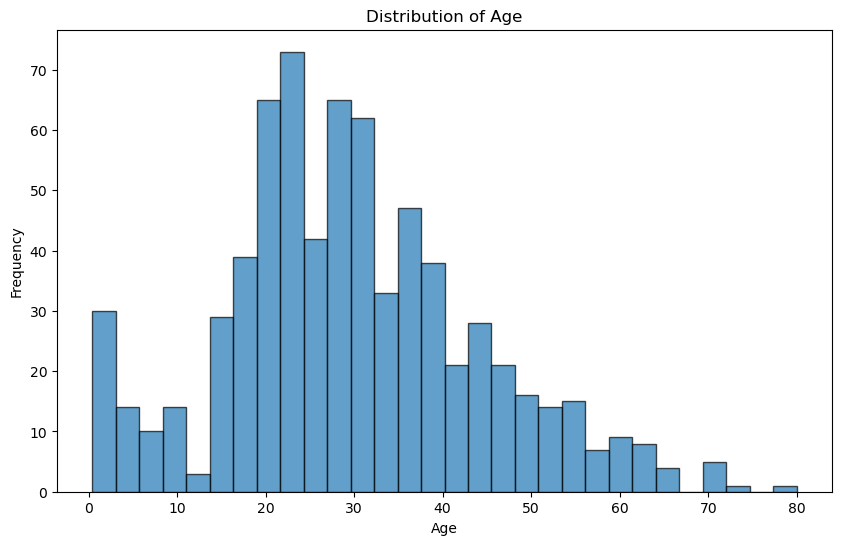

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(temp_df['Age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [9]:
age_mean = data['Age'].mean()
age_mean
data['Age'] = data['Age'].fillna(age_mean)


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   Fare      891 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [11]:
data.drop(columns=['Survived']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


In [12]:
target = data['Survived']
inputs = data.drop(columns=['Survived'],axis=1)
inputs.head()

,Sex,Age,Fare
0,1,22.0,7.2500
1,0,38.0,71.2833
2,0,26.0,7.9250
3,0,35.0,53.1000
4,1,35.0,8.0500


In [13]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [14]:
inputs.shape

(891, 3)

In [15]:
target.shape

(891,)

In [16]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    int64  
 1   Age     891 non-null    float64
 2   Fare    891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [17]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


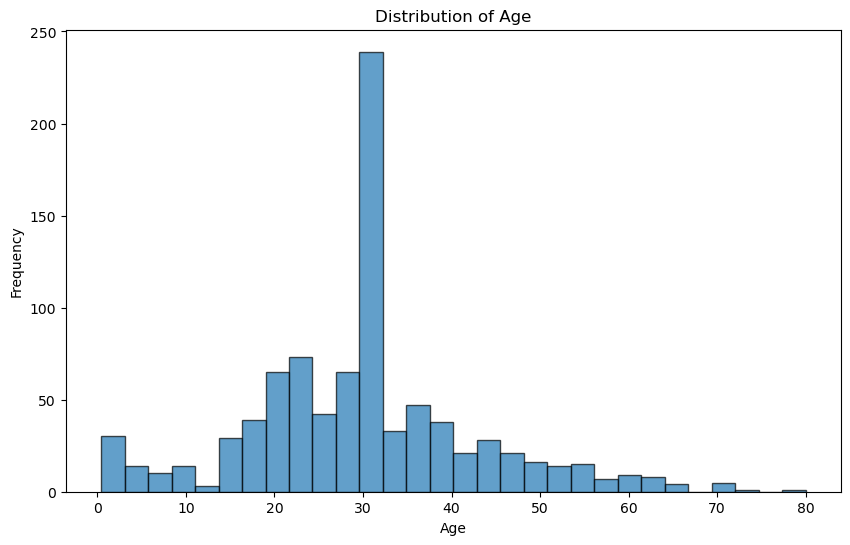

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


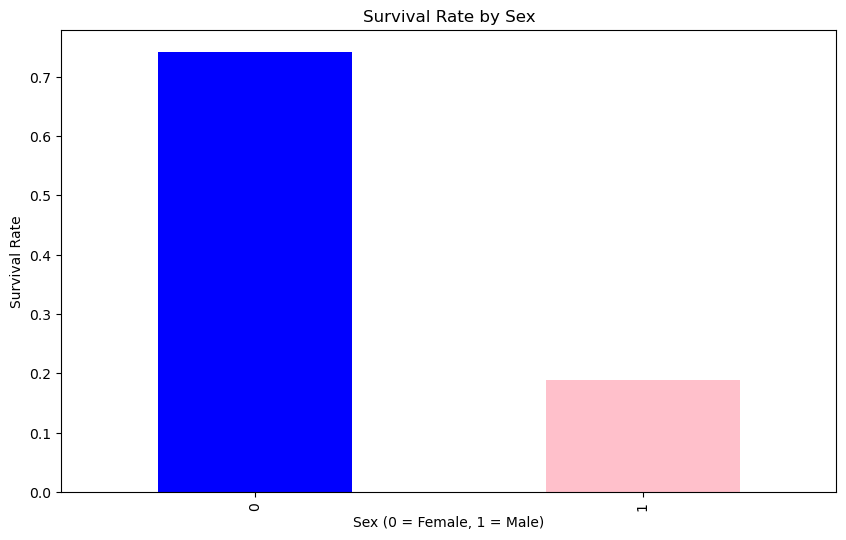

In [19]:
plt.figure(figsize=(10, 6))
survival_by_sex = data.groupby('Sex')['Survived'].mean()
survival_by_sex.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Survival Rate')
plt.show()


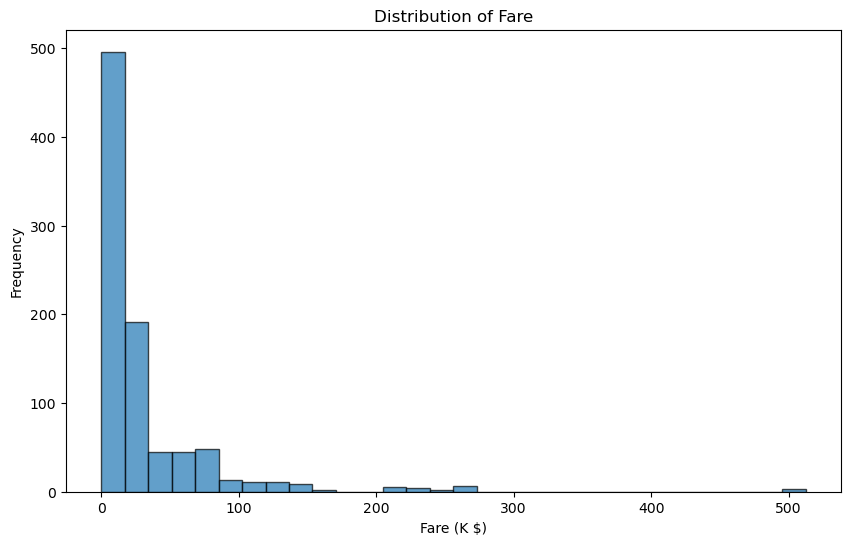

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(data['Fare'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Fare')
plt.xlabel('Fare (K $)')
plt.ylabel('Frequency')
plt.show()


In [36]:
target.value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=20)

In [25]:
X_train.shape

(712, 3)

In [26]:
X_test.shape

(179, 3)

In [27]:
y_train.shape

(712,)

In [28]:
y_test.shape

(179,)

In [39]:
from sklearn import tree
class_weights = {0: 1, 1: 549/342}
model = tree.DecisionTreeClassifier(class_weight=class_weights)


In [40]:
parameters = model.get_params()
parameters

{'ccp_alpha': 0.0,
 'class_weight': {0: 1, 1: 1.605263157894737},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [41]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 1.605263157894737})

In [42]:
model.score(X_test,y_test)

0.7541899441340782

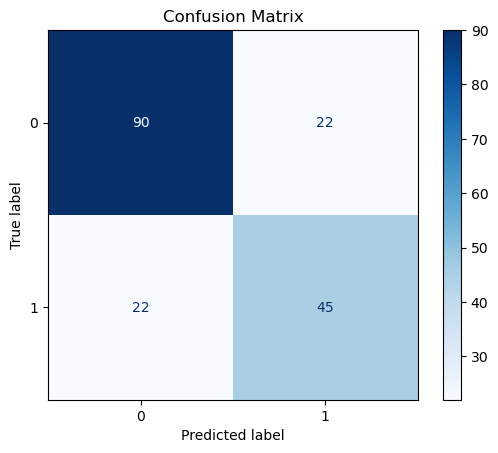

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       112
           1       0.67      0.67      0.67        67

    accuracy                           0.75       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



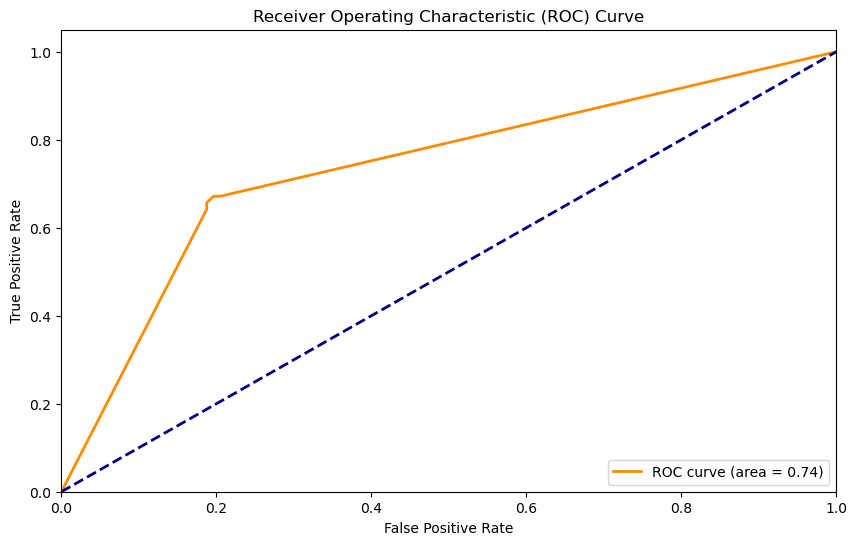

In [46]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', {0: 1, 1: 549/342}]
}

# Initialize the model
model = tree.DecisionTreeClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

# Evaluate the best model
best_model_score = best_model.score(X_test, y_test)
print(f"Best Model Accuracy: {best_model_score:.2f}")


Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Model Accuracy: 0.81


C:\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the model with the best parameters
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=5)

# Perform cross-validation
scores = cross_val_score(model, inputs, target, cv=5, scoring='accuracy')

# Print the cross-validation scores and the mean score
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [0.74860335 0.78651685 0.7752809  0.74157303 0.76966292]
Mean Cross-Validation Score: 0.7643274119640951


In [53]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('titanic.csv')

# Drop unnecessary columns
data = df.drop(columns=['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])

# Map 'Sex' column to numerical values
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

# Drop rows with missing values
data = data.dropna()
data

,Survived,Sex,Age,Fare
0,0,1,22.0,7.2500
1,1,0,38.0,71.2833
2,1,0,26.0,7.9250
3,1,0,35.0,53.1000
4,0,1,35.0,8.0500
...,...,...,...,...
885,0,0,39.0,29.1250
886,0,1,27.0,13.0000
887,1,0,19.0,30.0000
889,1,1,26.0,30.0000


In [54]:
target = data['Survived']
inputs = data.drop(columns=['Survived'], axis=1)


In [57]:
target.value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=20)


In [58]:
from sklearn.tree import DecisionTreeClassifier

class_weights = {0: 1, 1: 424/290}
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=5, class_weight=class_weights)

model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 1, 1: 1.4620689655172414}, max_depth=10,
                       min_samples_split=5)

Accuracy: 0.81


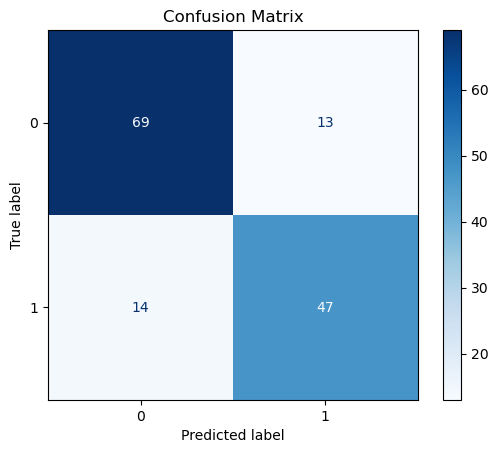

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.78      0.77      0.78        61

    accuracy                           0.81       143
   macro avg       0.81      0.81      0.81       143
weighted avg       0.81      0.81      0.81       143



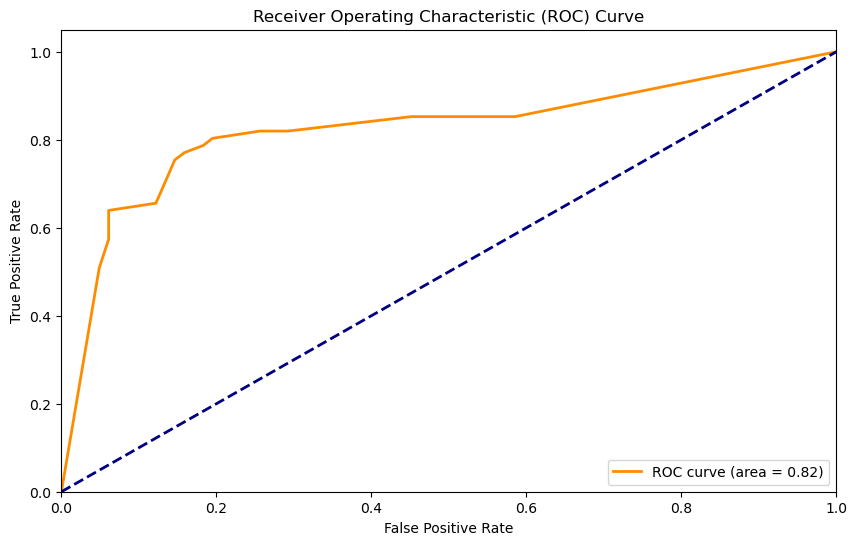

In [59]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
